## lets create some augmentation that can work with the tensorflow 

In [11]:
import librosa
import librosa.display
import colorednoise as cn
import matplotlib.pyplot as plt
import numpy as np

## following
## https://github.com/yuvaramsingh94/rainforest-cx/blob/densenet/code/augmentations.py

In [3]:
SR = 44100
sec_len = 10

pink_noise = cn.powerlaw_psd_gaussian(1, SR * sec_len)

In [4]:
pink_noise

array([2.29637264, 1.43475934, 1.60230539, ..., 1.28645117, 1.69881039,
       2.13069626])

In [14]:
n_fft = 1024
hop_length = 512
n_mels = 128
NewMax = 255.
NewMin = 0.

S_DB = librosa.feature.melspectrogram(pink_noise, sr=SR, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)
 
## lets reduce the noise amplitude
S_DB = (((S_DB - S_DB.min()) * (NewMax - NewMin)) / (S_DB.max() - S_DB.min())) + NewMin
S_DB = np.flipud(S_DB)
image = np.dstack([S_DB,S_DB,S_DB])

/tmp/ipykernel_529/4239718679.py:7: FutureWarning: Pass y=[2.29637264 1.43475934 1.60230539 ... 1.28645117 1.69881039 2.13069626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S_DB = librosa.feature.melspectrogram(pink_noise, sr=SR, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


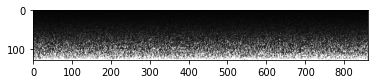

In [15]:
plt.imshow(image)

## Requirment for successfull implimentation . 

get the signal strenght and add it to the TFREC
use this signal strength ot generate the pink noise and add it is the same strenght calculation as in pink noise code